In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# from matplotlib import rcParams

# plt.style.use("ggplot")
# rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_json("eda_receitas_data/receitas.json")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


In [3]:
df.head(10)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0
5,"[Mix basil, mayonnaise and butter in processor...",79.0,2004-08-20 04:00:00+00:00,"[Sandwich, Food Processor, Tomato, Kid-Friendl...",948.0,This recipe can be prepared in 45 minutes or l...,19.0,4.375,The Best Blts,[2 1/2 cups (lightly packed) fresh basil leave...,1042.0
6,[Cook potatoes and carrots in large pot of boi...,NaN,2004-08-20 04:00:00+00:00,"[Salad, Potato, Side, Easter, Low Fat, Quick &...",NaN,Serve this newfangled main-course salad with a...,NaN,4.375,Ham and Spring Vegetable Salad with Shallot Vi...,"[1 1/2 pounds small red-skinned potatoes, each...",NaN
7,[Stir together sugar and chili powder. Whisk e...,NaN,2004-08-20 04:00:00+00:00,"[Egg, Fruit, No-Cook, Cocktail Party, Vegetari...",NaN,Pop one of these in your mouth for a burst of ...,NaN,3.750,Spicy-Sweet Kumquats,"[6 tablespoons granulated sugar, 1 1/2 tablesp...",NaN
8,"[Stir together soy sauce, sugar, sesame oil, w...",10.0,2004-08-20 04:00:00+00:00,"[Beef, Ginger, Sauté, Stir-Fry, Quick & Easy, ...",170.0,Bulgogi,7.0,4.375,Korean Marinated Beef,"[1/4 cup soy sauce, 1 tablespoon sugar, 2 teas...",1272.0
9,[Chop enough parsley leaves to measure 1 table...,41.0,2008-10-23 22:24:26+00:00,"[Salad, Mustard, Potato, Picnic, Lunch, Mayonn...",602.0,Transform your picnic into un pique-nique to r...,23.0,3.750,Ham Persillade with Mustard Potato Salad and M...,"[6 long parsley sprigs, divided, 1 3/4 cups re...",1696.0


In [4]:
df.isna().sum()

directions       19
fat            4222
date             19
categories       19
calories       4154
desc           6635
protein        4201
rating           30
title            19
ingredients      19
sodium         4156
dtype: int64

In [5]:
df = df[df["title"].duplicated() == False].sort_values("title").drop(columns=["directions", "ingredients", "date", "desc"]).reset_index(drop=True)

In [6]:
df.head()

,fat,categories,calories,protein,rating,title,sodium
0,NaN,"[Cheese, Vegetable, No-Cook, Vegetarian, Quick...",NaN,NaN,3.125,"""Adult"" Pimiento Cheese",NaN
1,133.0,"[Tomato, Vegetable, Appetizer, Side, Vegetaria...",1386.0,9.0,3.750,"""Blanketed"" Eggplant",105.0
2,16.0,"[Condiment/Spread, Tomato, Appetizer, Kid-Frie...",189.0,2.0,5.000,"""Bloody Mary"" Tomato Toast with Celery and Hor...",517.0
3,18.0,"[Cookbook Critic, Dessert, Brownie, Nut, Walnu...",321.0,5.0,0.000,"""Brown on Blonde"" Blondies",120.0
4,13.0,"[Salad, Ginger, Rice, Vegetable, Side, Vegetar...",369.0,9.0,4.375,"""California Roll"" Salad",953.0


In [7]:
ordem_colunas = [ 'title', 'fat', 'calories', 'protein', 'rating',
       'sodium', 'categories']
df = df[ordem_colunas].dropna().reset_index(drop=True)
df 

,title,fat,calories,protein,rating,sodium,categories
0,"""Blanketed"" Eggplant",133.0,1386.0,9.0,3.750,105.0,"[Tomato, Vegetable, Appetizer, Side, Vegetaria..."
1,"""Bloody Mary"" Tomato Toast with Celery and Hor...",16.0,189.0,2.0,5.000,517.0,"[Condiment/Spread, Tomato, Appetizer, Kid-Frie..."
2,"""Brown on Blonde"" Blondies",18.0,321.0,5.0,0.000,120.0,"[Cookbook Critic, Dessert, Brownie, Nut, Walnu..."
3,"""California Roll"" Salad",13.0,369.0,9.0,4.375,953.0,"[Salad, Ginger, Rice, Vegetable, Side, Vegetar..."
4,"""Candy Corn"" Frozen Citrus Cream Pops",9.0,251.0,6.0,2.500,88.0,"[Milk/Cream, Dessert, Freeze/Chill, Vegetarian..."
...,...,...,...,...,...,...,...
14030,Zucchini-Blossom Quesadillas,7.0,132.0,6.0,3.750,147.0,"[Cheese, Garlic, Onion, Tomato, Vegetable, Veg..."
14031,Zucchini-Cilantro Dip,14.0,162.0,4.0,3.125,279.0,"[Condiment/Spread, Herb, Appetizer, No-Cook, S..."
14032,Zucchini-Herb Fritters with Garlic Yogurt,13.0,153.0,3.0,5.000,354.0,"[Side, Kid-Friendly, Quick & Easy, Yogurt, Zuc..."
14033,Zucchini-Pecan Cake with Cream Cheese Frosting,31.0,453.0,6.0,4.375,315.0,"[Cake, Mixer, Egg, Dessert, Bake, Kentucky Der..."


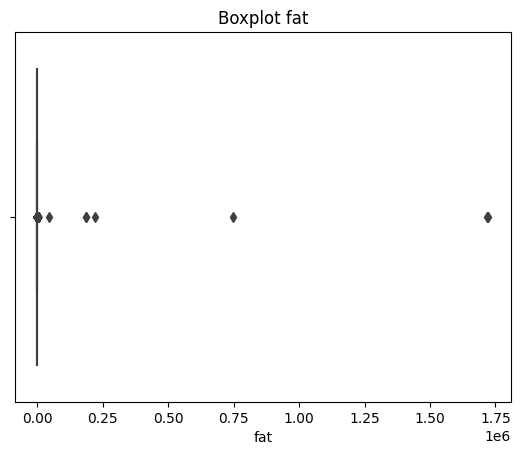

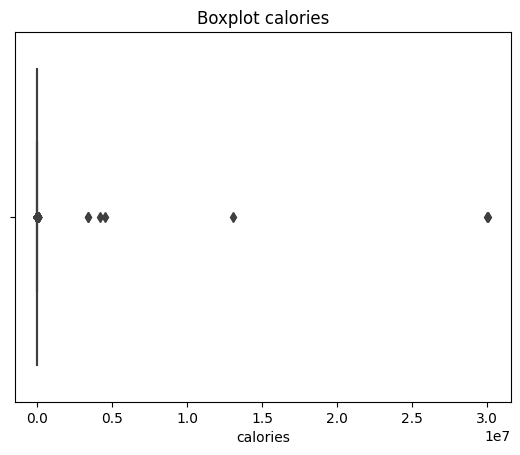

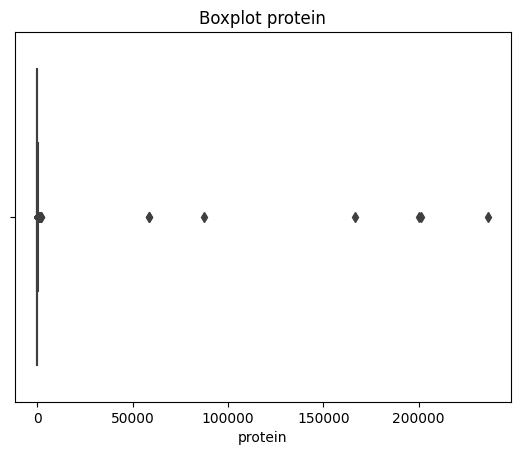

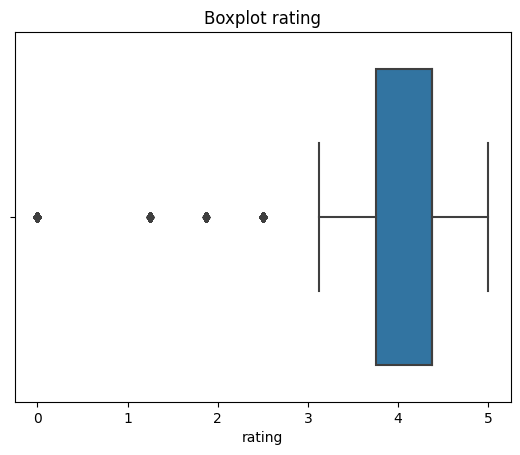

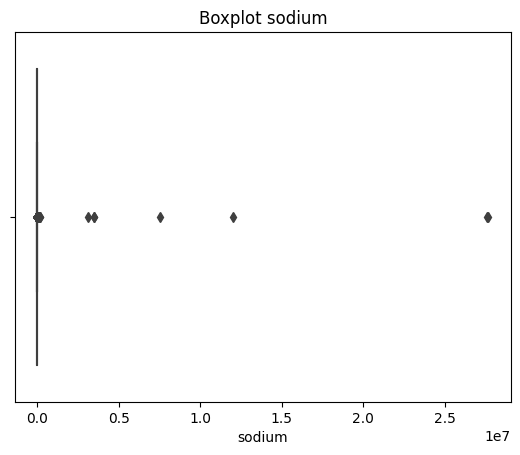

In [8]:
num_features = ['fat', 'calories', 'protein', 'rating', 'sodium']

for i, feat in enumerate(num_features):
    plt.figure(i)
    plt.title(f"Boxplot {feat}")
    sns.boxplot(df, x=feat)

In [9]:
num_features = ['fat', 'calories', 'protein', 'sodium']

for feat in num_features:
    percentile25 = df[feat].quantile(0.25)
    percentile75 = df[feat].quantile(0.75)
    iqr = percentile75 - percentile25
    
    limite_superior = percentile75 + 1.5 * iqr
    limite_inferior = percentile25 - 1.5 * iqr
    
    array_superior = np.where(df[feat] >= limite_superior)[0]
    array_inferior = np.where
    df = df[(df[feat] > limite_inferior) & (df[feat] < limite_superior)]

In [10]:
df

,title,fat,calories,protein,rating,sodium,categories
1,"""Bloody Mary"" Tomato Toast with Celery and Hor...",16.0,189.0,2.0,5.000,517.0,"[Condiment/Spread, Tomato, Appetizer, Kid-Frie..."
2,"""Brown on Blonde"" Blondies",18.0,321.0,5.0,0.000,120.0,"[Cookbook Critic, Dessert, Brownie, Nut, Walnu..."
3,"""California Roll"" Salad",13.0,369.0,9.0,4.375,953.0,"[Salad, Ginger, Rice, Vegetable, Side, Vegetar..."
4,"""Candy Corn"" Frozen Citrus Cream Pops",9.0,251.0,6.0,2.500,88.0,"[Milk/Cream, Dessert, Freeze/Chill, Vegetarian..."
5,"""Cannoli"" Ice Cream Sandwiches",20.0,379.0,7.0,3.750,289.0,"[Chocolate, Dessert, Freeze/Chill, Picnic, Veg..."
...,...,...,...,...,...,...,...
14030,Zucchini-Blossom Quesadillas,7.0,132.0,6.0,3.750,147.0,"[Cheese, Garlic, Onion, Tomato, Vegetable, Veg..."
14031,Zucchini-Cilantro Dip,14.0,162.0,4.0,3.125,279.0,"[Condiment/Spread, Herb, Appetizer, No-Cook, S..."
14032,Zucchini-Herb Fritters with Garlic Yogurt,13.0,153.0,3.0,5.000,354.0,"[Side, Kid-Friendly, Quick & Easy, Yogurt, Zuc..."
14033,Zucchini-Pecan Cake with Cream Cheese Frosting,31.0,453.0,6.0,4.375,315.0,"[Cake, Mixer, Egg, Dessert, Bake, Kentucky Der..."


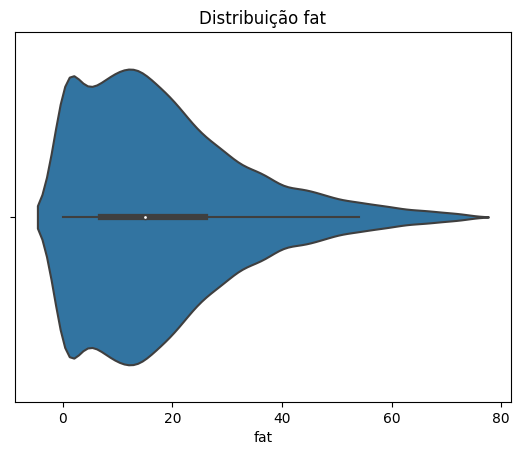

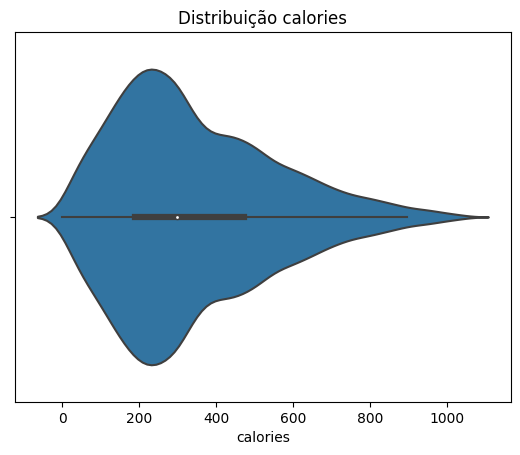

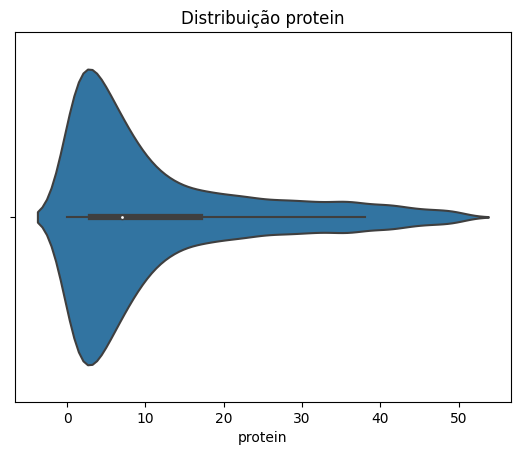

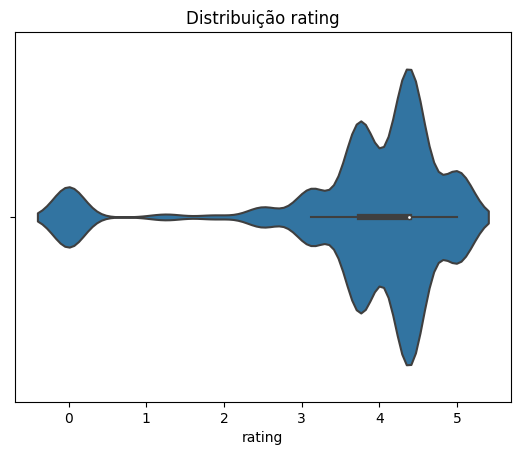

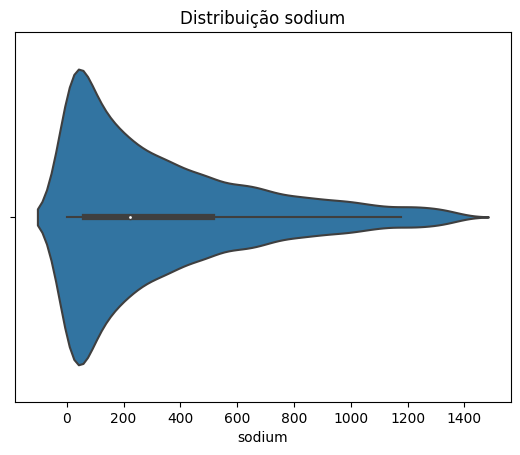

In [11]:
num_features = ['fat', 'calories', 'protein', 'rating', 'sodium']

for i, feat in enumerate(num_features):
    plt.figure(i)
    plt.title(f"Distribuição {feat}")
    sns.violinplot(df, x=feat)

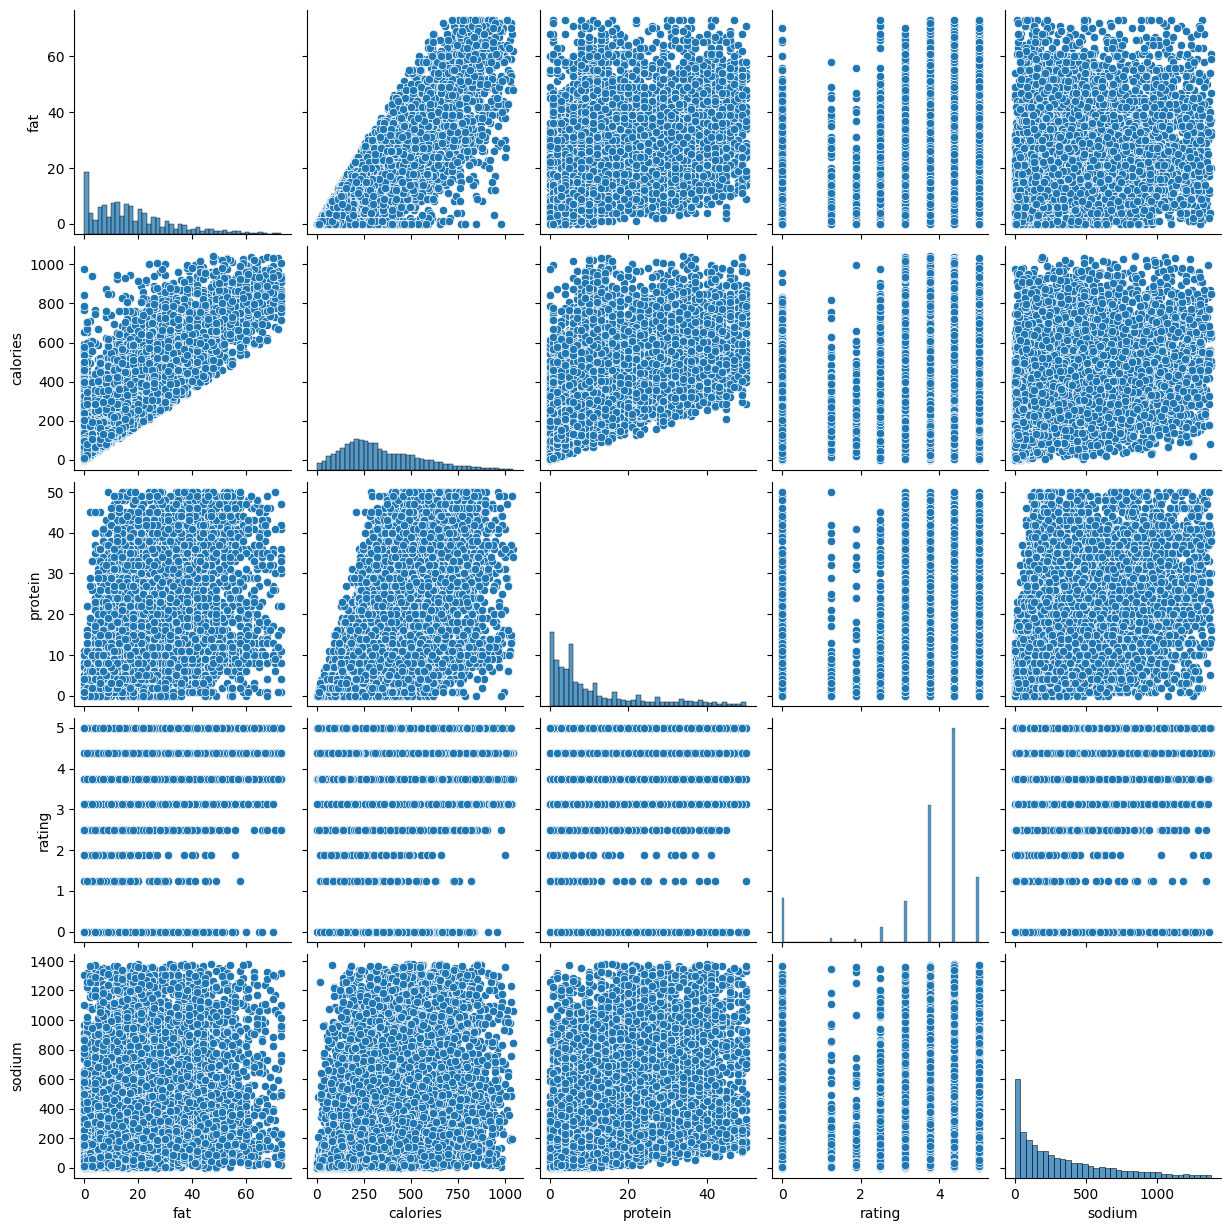

In [12]:
sns.pairplot(df)
plt.show()

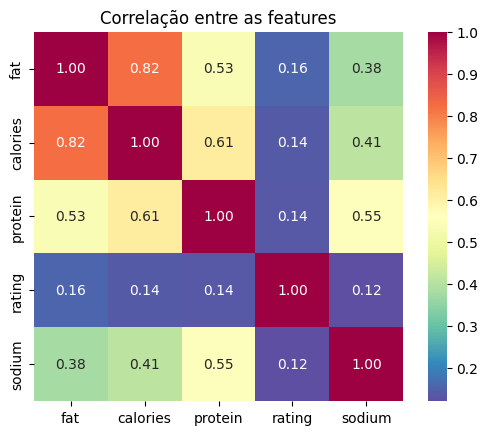

In [13]:
corr = df.iloc[:, 1:-1].corr()
sns.heatmap(corr, 
            cbar=True, 
            annot=True, 
            square=True, 
            fmt='.2f', 
            cmap="Spectral_r"
           )
plt.title("Correlação entre as features")
plt.show()

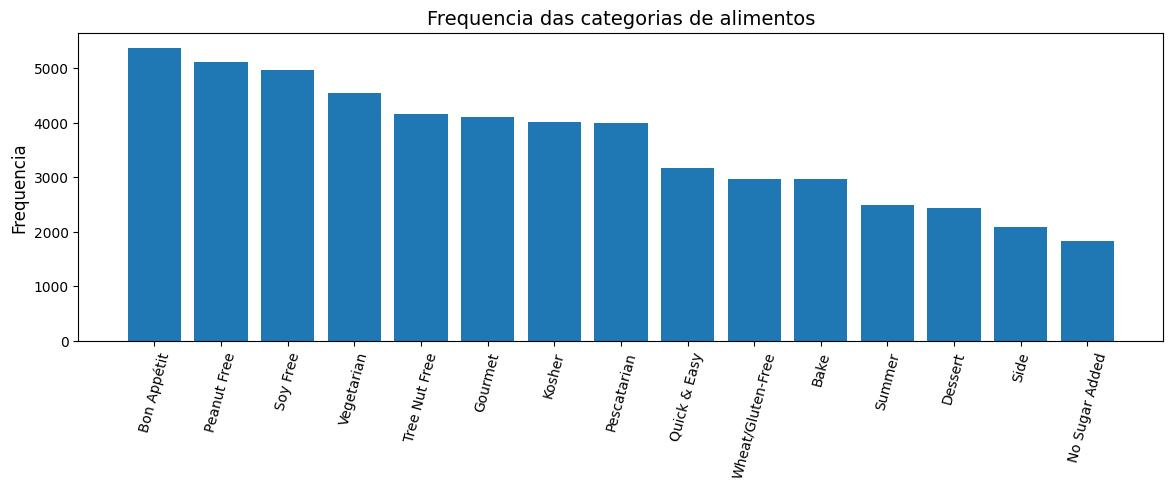

In [14]:
categorias = df["categories"].explode().value_counts()
categorias_unicas = categorias.index.tolist()
contagem_categorias_unicas = categorias.values

fig, ax = plt.subplots(figsize = (14,4))
plt.xticks(rotation=75)
ax.bar(categorias_unicas[:15], contagem_categorias_unicas[:15])
ax.set_ylabel("Frequencia", size = 12)
ax.set_title("Frequencia das categorias de alimentos", size = 14)
plt.show()